### Setup

In [49]:
import numpy as np

%run utils/utils_data_cleaning.py
%run utils/utils_maps.py

### Load a subset of the dataset

In [208]:
df = load_taxi_data_chunk(chunk=50000)
handle_missing_data(df)
df.head()

Data loaded with 50000 entries and 10 columns
Size reduction from 50000 to 48804 (1196 samples dropped for missing data)


,pu_t,do_t,trip_dist,pu_lon,pu_lat,do_lon,do_lat,duration,vec_dist,trip_ratio
0,2016-02-16 19:56:06,2016-02-16 20:10:46,8.53,-73.995750,40.764488,-73.926292,40.867458,880,7.983998,1.068387
1,2016-02-11 10:23:41,2016-02-11 10:45:04,1.95,-73.994110,40.751068,-73.993401,40.736019,1283,1.039087,1.876648
2,2016-02-21 14:21:57,2016-02-21 14:30:07,0.50,-73.973160,40.752728,-73.982178,40.756962,490,0.556130,0.899070
3,2016-02-11 22:51:59,2016-02-11 22:57:41,1.30,-73.991280,40.744808,-73.985909,40.731178,342,0.981839,1.324045
4,2016-02-13 18:32:08,2016-02-13 18:43:51,1.50,-73.992897,40.741280,-73.975967,40.748734,703,1.026608,1.461123


### Simple Plot

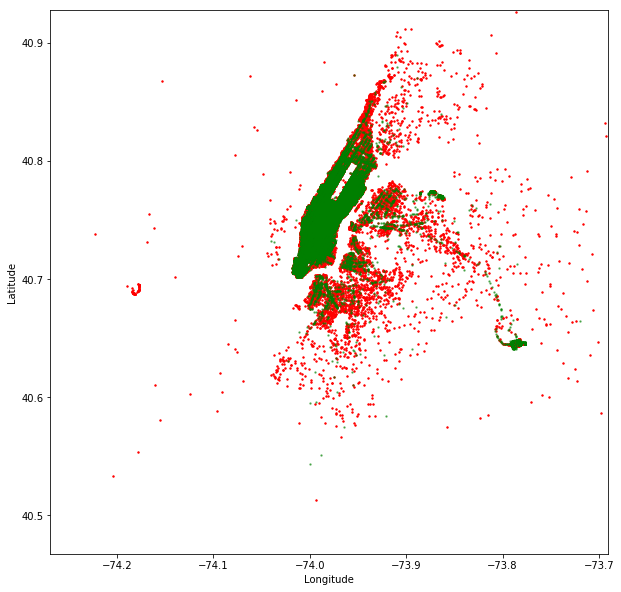

In [209]:
plot_coordinates(df, focus=False)

### Let's define a bounding box for NYC

Using this tool https://www.mapdevelopers.com/geocode_bounding_box.php, it is possible to retrieve the bounding coordinates for a given address. For NYC, we get the following:

North Latitude: 40.917577 
<br>South Latitude: 40.477399
<br>East Longitude: -73.700272
<br>West Longitude: -74.259090

In [151]:
lat_north, lat_south =  40.917577, 40.477399 
lon_east,   lon_west = -73.700272, -74.259090

### Coordinates histograms

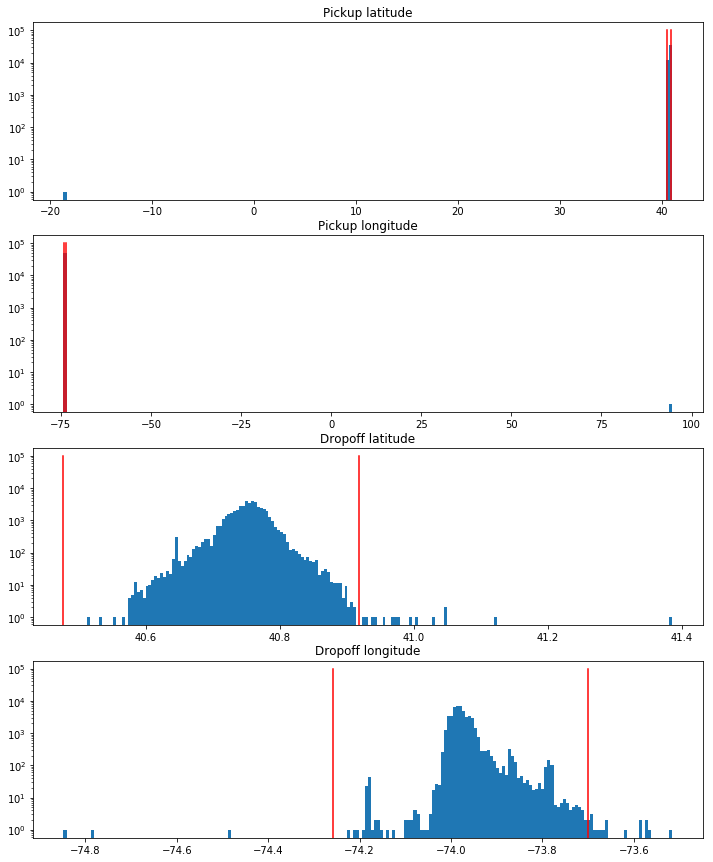

In [211]:
fig = plt.figure(figsize=(12,15))

titles = ['Pickup latitude', 'Pickup longitude', 'Dropoff latitude', 'Dropoff longitude']
coords = [df.pu_lat, df.pu_lon, df.do_lat, df.do_lon]

ax = [fig.add_subplot(4,1,i+1) for i in range(4)]
for i in range(4):
    ax[i].hist(coords[i], bins=200, log=True)
    ax[i].set_title(titles[i])

for i in [0,2]:
    ax[i].plot((lat_south, lat_south),(0,1e5), c='r')
    ax[i].plot((lat_north, lat_north),(0,1e5), c='r')

for i in [1,3]:
    ax[i].plot((lon_west, lon_west),(0,1e5), c='r')
    ax[i].plot((lon_east, lon_east),(0,1e5), c='r')

### Filter out data points lying outside the NYC boounding box 

These limitations should be established as a preprocessing step in utils_data_cleaning.py (**handle_spatial_outliers**)

In [212]:
handle_spatial_outliers(df)

Size reduction from 48804 to 48772 (32 samples dropped for having outside the region of interest)


### Let's replot everything

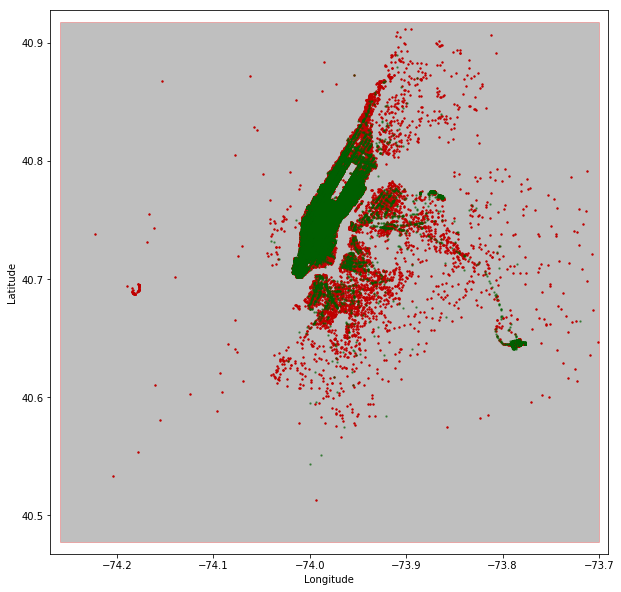

In [213]:
plot_coordinates(df, focus=False, bbox=True)

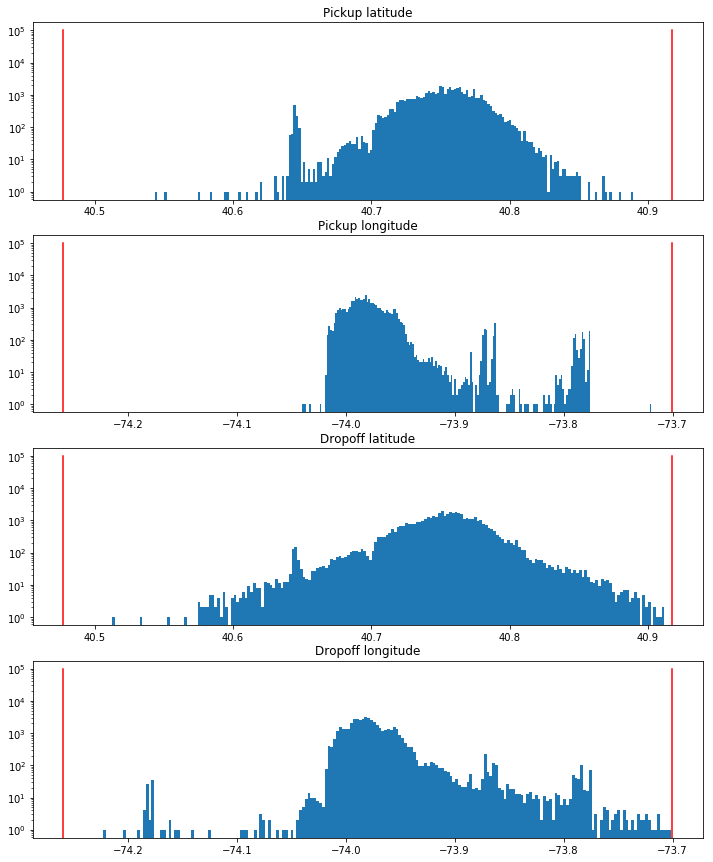

In [214]:
fig = plt.figure(figsize=(12,15))

titles = ['Pickup latitude', 'Pickup longitude', 'Dropoff latitude', 'Dropoff longitude']
coords = [df.pu_lat, df.pu_lon, df.do_lat, df.do_lon]

ax = [fig.add_subplot(4,1,i+1) for i in range(4)]
for i in range(4):
    ax[i].hist(coords[i], bins=200, log=True)
    ax[i].set_title(titles[i])

for i in [0,2]:
    ax[i].plot((lat_south, lat_south),(0,1e5), c='r')
    ax[i].plot((lat_north, lat_north),(0,1e5), c='r')

for i in [1,3]:
    ax[i].plot((lon_west, lon_west),(0,1e5), c='r')
    ax[i].plot((lon_east, lon_east),(0,1e5), c='r')

### Heatmap plots using Folium

In [215]:
pick_dat = df[['pu_lat','pu_lon']].values
drop_dat = df[['do_lat','do_lon']].values
both_dat = np.concatenate([pick_dat, drop_dat], axis=0)

d = [pick_dat, drop_dat, both_dat]
folium_map(d[2])

### Checking geospatial distance

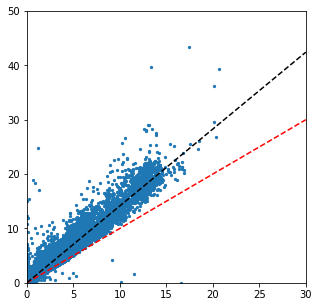

In [216]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df.vec_dist, df.trip_dist, s = 5)
plt.plot((0,30),(0,30), '--', c='r')
plt.plot((0,30),(0,np.sqrt(2)*30), '--', c='k')
plt.xlim((0,30))
plt.ylim((0,50))
plt.show()

In [217]:
str_stats = "\tmin = {0}\n\tmax = {1}\n\tmean = {2}\n\tmedian = {3}"

print('All samples:')
print(str_stats.format(df.trip_ratio.min(), df.trip_ratio.max(), df.trip_ratio.mean(), df.trip_ratio.median()))

All samples:
	min = 0.0030205220791940735
	max = 2292.453044880653
	mean = 1.9096203688960809
	median = 1.3104452861308011


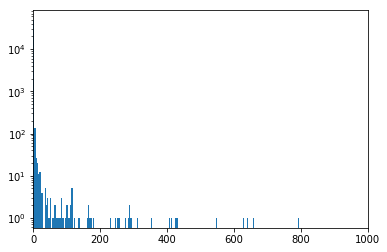

In [218]:
plt.hist(df.trip_ratio,bins=600, log=True)
plt.xlim(0,1000)
plt.show()

### Remove samples presenting very high ratio

In [219]:
handle_invalid_trips(df)

Size reduction from 48772 to 48686 (86 samples dropped for being invalid)


In [220]:
str_stats = "\tmin = {0}\n\tmax = {1}\n\tmean = {2}\n\tmedian = {3}"

print('All samples:')
print(str_stats.format(df.trip_ratio.min(), df.trip_ratio.max(), df.trip_ratio.mean(), df.trip_ratio.median()))

All samples:
	min = 0.0030205220791940735
	max = 24.958763482213083
	mean = 1.3759498521199753
	median = 1.3099911409925156


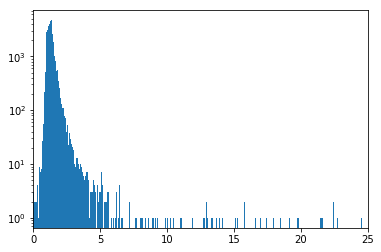

In [221]:
plt.hist(df.trip_ratio,bins=500, log=True)
plt.xlim(0,25)
plt.show()

--------
### Generating plots for project report

In [5]:
import pickle as pkl

In [6]:
df = pkl.load(open('../data/dataset_10M.pkl', 'rb'))
df = df.drop('index',axis=1)

#Randomly select 10% of the dataset to raise some statistics
df = df.sample(n = int(0.1 * len(df))).reset_index()
df = df.drop('index',axis=1)

df.head()

,pu_t,do_t,trip_dist,pu_lon,pu_lat,do_lon,do_lat,duration,vec_dist,trip_ratio
0,2016-02-14 23:04:24,2016-02-14 23:06:15,0.30,-73.984749,40.748081,-73.989044,40.744438,111,0.337645,0.888508
1,2016-01-22 14:26:21,2016-01-22 14:43:05,2.93,-73.976288,40.760162,-74.006958,40.740768,1004,2.093125,1.399821
2,2016-01-12 17:11:09,2016-01-12 17:25:26,3.46,-74.014534,40.710419,-73.995270,40.749596,857,2.886246,1.198789
3,2016-01-05 12:39:11,2016-01-05 12:49:38,1.90,-73.992264,40.715145,-73.976440,40.739670,627,1.885127,1.007890
4,2016-02-08 15:41:23,2016-02-08 16:18:35,15.80,-73.862885,40.768818,-74.017105,40.705341,2232,9.203550,1.716729


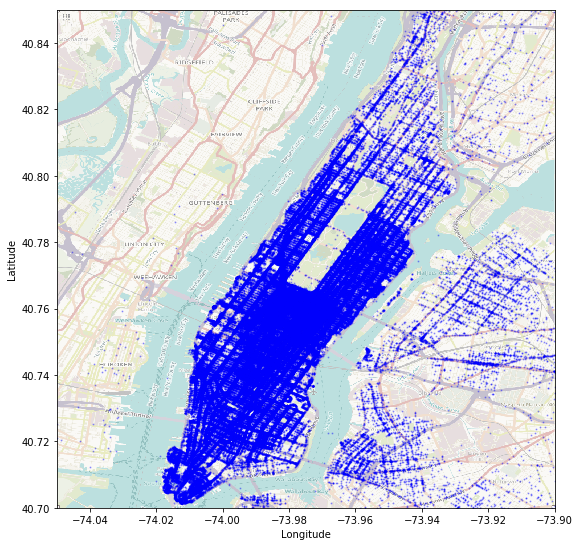

In [149]:
image = plt.imread('figures/manhattan_region.png')

plt.figure(figsize=(8,8))

n_points = 150000
mini_df = df.sample(n_points)

plt.imshow(image, alpha=.6, extent=[-74.05, -73.9, 40.7, 40.85])
plt.scatter(mini_df['do_lon'], mini_df['do_lat'], color='b', s=1, alpha = 0.3)
plt.scatter(mini_df['pu_lon'], mini_df['pu_lat'], color='b', s=1, alpha = 0.3)

plt.xlim((-74.05, -73.9))
plt.ylim((40.7, 40.85))
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.savefig('../figures/trips_on_map.png', dpi=500);
plt.show()

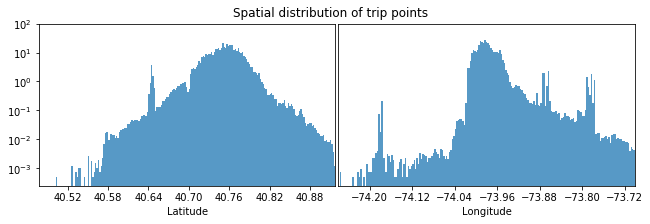

In [430]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(9,3))

titles = ['latitude','longitude']

coords = [pd.concat([df.pu_lat, df.do_lat]), pd.concat([df.pu_lon, df.do_lon])]

gs1 = gridspec.GridSpec(1,2)
gs1.update(wspace=0.01, hspace=0.0) # set the spacing between axes. 

ax = [fig.add_subplot(1,2,i+1) for i in range(2)]

max_y = 10e1

ax[0] = plt.subplot(gs1[0])

ax[0].hist(coords[0], bins=200, log=True, alpha=.75, density=True)
ax[0].set_xlim(lat_south,lat_north)
ax[0].set_ylim(0,max_y)
ax[0].xaxis.set_ticks(np.arange(40.52, 40.9, .06))
ax[0].set_xlabel('Latitude')
ax[0].tick_params(axis='y', which='minor', left=False)


ax[1] = plt.subplot(gs1[1])

ax[1].hist(coords[1], bins=200, log=True, alpha=.75, density=True)
ax[1].set_xlim(lon_west,lon_east)
ax[1].set_ylim(0,max_y)
ax[1].xaxis.set_ticks(np.arange(-74.2, -73.65, .08))
ax[1].set_xlabel('Longitude')


ax[1].set_yticklabels([])
ax[1].tick_params(axis='y', which='both', left=False)

plt.tight_layout()
fig.subplots_adjust(top=0.9, bottom = .15, left=0.05, right=0.97)

plt.suptitle('Spatial distribution of trip points')
plt.savefig('../figures/trip_spatial_distribution.png', dpi=500);

plt.show()

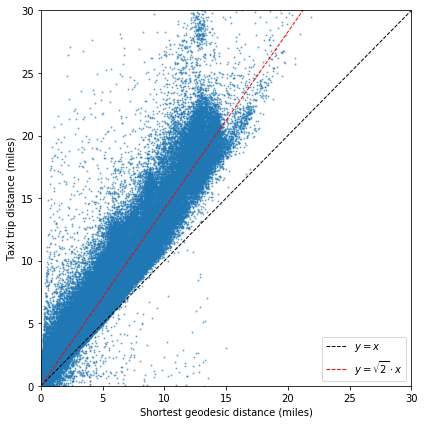

In [423]:
fig = plt.figure(figsize=(6,6))
plt.scatter(df.vec_dist, df.trip_dist, s = 1, alpha = .5)

plt.plot((0,30),(0,30), '--', c='k', linewidth=1, label='$y = x$')
plt.plot((0,30),(0,np.sqrt(2)*30), '--', c='r', linewidth=1, label='$y =\sqrt{2}\cdot x$')

plt.xlim((0,30))
plt.ylim((0,30))
plt.ylabel('Taxi trip distance (miles)')
plt.xlabel('Shortest geodesic distance (miles)')

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:-1], labels[:-1], loc = 4)

plt.tight_layout()
plt.savefig('../figures/trip_dist_vs_geo_dist.png', dpi=500);
plt.show() #s reported by the taximeter.